# Assignment 1
## Create a Fully Connected Minimal Neural Network for MNIST Dataset

### Install necessary libraries
#### If the libraries are not installed, please uncomment the code cell below and run

In [1]:
# ! pip install numpy 

In [1]:
import sklearn
sklearn.__version__

'1.0.2'

### Import the necessary libraries

In [2]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

### Fetch the MNIST dataset

In [4]:
# WONT WORK WITH OLDER VERSIONS OF SCIKIT-LEARN
# from sklearn.datasets import fetch_mldata
# mnist = fetch_mldata('MNIST original')

In [3]:
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
X.shape, y.shape

((70000, 784), (70000,))

### Normalization of data

In [6]:
from sklearn.preprocessing import MinMaxScaler

# create a MinMaxScaler object
scaler = MinMaxScaler()

# fit the scaler to the data and transform X
X_scaled = scaler.fit_transform(X)

### Preparing the dataset

In [7]:
digits = 10
examples = y.shape[0]
y = np.array([y]).reshape(1, examples)        #before doing y.reshape I change it to an array first. Finally y is an 1x70000 array. 
Y_new = np.eye(digits)[y.astype('int32')]       #1x70000x10
Y_new = Y_new.T.reshape(digits, examples)       #10x70000


In [20]:
y.shape

(1, 70000)

In [9]:
Y_new.shape,Y_new                          #one-hot encoder

((10, 70000),
 array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [21]:
X=X_scaled

In [22]:
m = 60000                   #60000 for training
m_test = X.shape[0] - m     #10000 for testing

X_train, X_test = X[:m].T, X[m:].T
Y_train, Y_test = Y_new[:,:m], Y_new[:,m:]

shuffle_index = np.random.permutation(m)
X_train, Y_train = X_train[:, shuffle_index], Y_train[:, shuffle_index]      #shuffled order

In [23]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((784, 60000), (784, 10000), (10, 60000), (10, 10000))

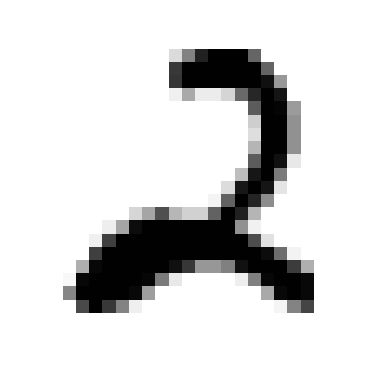

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.])

In [24]:
i = 12
plt.imshow(X_train[:,i].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
Y_train[:,i]

### Loss function

In [25]:
def compute_multiclass_loss(Y, Y_hat):

    m = Y.shape[1]
    L = np.sum((Y_hat - Y) ** 2) / (m * Y.shape[0])

    return L

### Try the efficient loss function as well

In [26]:
def compute_multiclass_loss_efficient(Y, Y_hat):

    L_sum = np.sum(-np.log(Y_hat) * Y)
    m = Y.shape[1]
    L = L_sum / m

    return L

### Train the model

In [27]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [99]:
n_x = X_train.shape[0]                #784 features
n_h = 64                              #64 neurons 
learning_rate = 1

W1 = np.random.randn(n_h, n_x)        #from input to hidden layer: a random matrix(64,784)
b1 = np.zeros((n_h, 1))               #from input to hidden layer: a zero matrix(64,1)
W2 = np.random.randn(digits, n_h)     #from the hidden layer to output: a random matrix(10,64)
b2 = np.zeros((digits, 1))            #from the hidden layer to output: a zero matrix(10,1)

X = X_train
Y = Y_train


for i in range(2000):

    Z1 = np.matmul(W1,X)+b1         #sum: 64x784 X 784x60000 + 64x1
    A1 = sigmoid(Z1)                   #sigmoid: 64x60000
    Z2 = np.matmul(W2,A1)+b2           #sum: 10x64 X 64x60000 + 10x1
    A2 = np.exp(Z2)/np.sum(np.exp(Z2), axis=0)    #softmax: 10x60000

    cost = compute_multiclass_loss_efficient(Y, A2)

    dZ2 = A2 - Y                        
    dW2 = np.matmul((A2 - Y), A1.T)/m   
    db2 = np.sum(A2 - Y, axis=1, keepdims=True)/m      

    dA1 = np.matmul(W2.T, (A2 - Y))     
    dZ1 = dA1*sigmoid(Z1)*(1-sigmoid(Z1))  
    dW1 = np.matmul(dZ1,X.T)/m
    db1 = np.sum(dZ1,axis=1, keepdims=True)/m

    W2 = W2-dW2*learning_rate
    b2 = b2-db2*learning_rate
    W1 = W1-dW1*learning_rate
    b1 = b1-db1*learning_rate

    if (i % 100 == 0):
        print("Epoch", i, "cost: ", cost)

print("Final cost:", cost)

Epoch 0 cost:  11.036180613936944
Epoch 100 cost:  0.771038256880198
Epoch 200 cost:  0.5750471024698531
Epoch 300 cost:  0.49326712083074303
Epoch 400 cost:  0.4440121605163531
Epoch 500 cost:  0.4094864873092847
Epoch 600 cost:  0.38344511113168644
Epoch 700 cost:  0.3629428672453237
Epoch 800 cost:  0.3461496935319696
Epoch 900 cost:  0.33197296328279646
Epoch 1000 cost:  0.3197173574448934
Epoch 1100 cost:  0.3089245010499718
Epoch 1200 cost:  0.29928652377183246
Epoch 1300 cost:  0.29058936467048546
Epoch 1400 cost:  0.282676861965666
Epoch 1500 cost:  0.2754303905130122
Epoch 1600 cost:  0.268756355699893
Epoch 1700 cost:  0.26257831945177357
Epoch 1800 cost:  0.2568327845739807
Epoch 1900 cost:  0.25146643737269314
Final cost: 0.24648277307134137


### Predictions

In [100]:
from sklearn.metrics import classification_report, confusion_matrix
Z1 = np.matmul(W1, X_test) + b1
A1 = sigmoid(Z1)
Z2 = np.matmul(W2, A1) + b2
A2 = np.exp(Z2) / np.sum(np.exp(Z2), axis=0)

predictions = np.argmax(A2, axis=0)
labels = np.argmax(Y_test, axis=0)

print(confusion_matrix(predictions, labels))

[[ 948    0   11    3    1   17   17    3    9    6]
 [   0 1103    8    3    1    2    1    9    4    5]
 [   4    6  921   22    6    4    9   25    7    3]
 [   4    6   19  916    0   31    4    8   24    7]
 [   0    1   11    1  900    7   11    7   11   50]
 [  12    0    2   26    3  777   14    2   23    7]
 [   6    4   14    2   16   17  896    0   15    1]
 [   2    3   16   10    6    6    1  944    7   21]
 [   3   12   26   16    5   24    5    2  859   22]
 [   1    0    4   11   44    7    0   28   15  887]]


In [101]:
print(classification_report(predictions, labels))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      1015
           1       0.97      0.97      0.97      1136
           2       0.89      0.91      0.90      1007
           3       0.91      0.90      0.90      1019
           4       0.92      0.90      0.91       999
           5       0.87      0.90      0.88       866
           6       0.94      0.92      0.93       971
           7       0.92      0.93      0.92      1016
           8       0.88      0.88      0.88       974
           9       0.88      0.89      0.88       997

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.92      0.92      0.92     10000



## 92% Accuracy